R-squared: 0.1276300418932591
RMSE: 0.6104997822906514


E:\Data\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


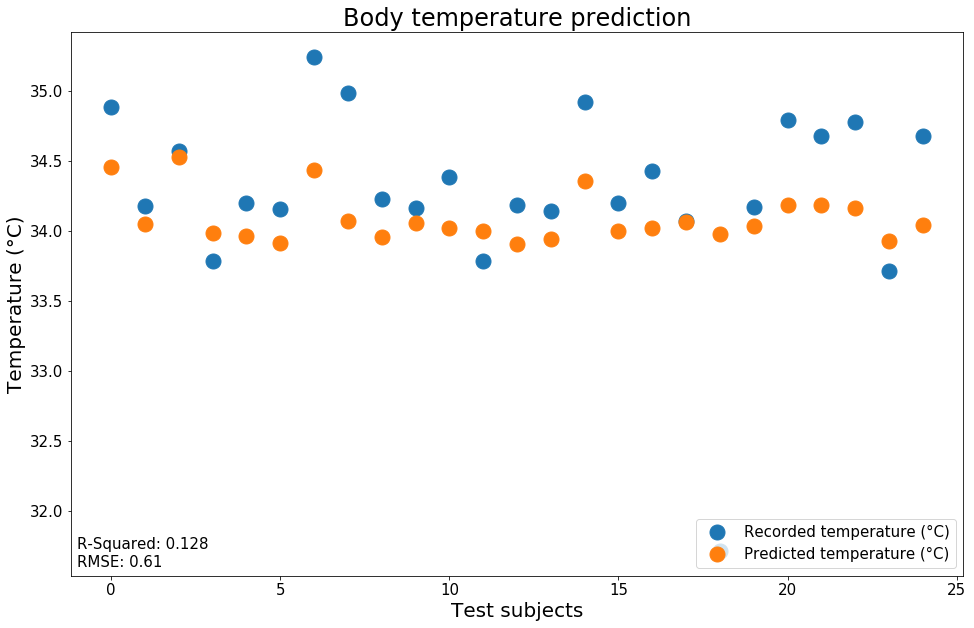

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

stt = pd.read_csv('study_temp_reshaped.csv', index_col=0)

y = stt['Temperature']
X = stt.drop('Temperature', axis=1)
X = X[['Interested', 'Happy', 'nervous', 'Strong', 'Weight', 'Height', 'worried', 'Determined']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

rgs = SVR()
rgs.fit(X_train, y_train)

y_pred = rgs.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print('R-squared: {0}'.format(r2))
print('RMSE: {0}'.format(rmse))

plt.figure(2, figsize=(16, 10))
title_font = {'size': '24'}
axis_font = {'size': '20'}
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.plot(y_test, 'o', markersize=15, label='Recorded temperature (°C)')
plt.plot(y_pred, 'o', markersize=15, label='Predicted temperature (°C)')
plt.xlabel('Test subjects', **axis_font)
plt.ylabel('Temperature (°C)', **axis_font)
plt.title('Body temperature prediction', **title_font)
plt.text(-1, 31.6, 'R-Squared: {0}\nRMSE: {1}'.format(np.round(r2, 3), np.round(rmse, 3)), fontsize=15)
plt.legend(loc='lower right', prop={'size': 15})